In [157]:
import pandas as pd
import numpy as np
from datetime import *

# Restaurant Operating hours data

In [158]:
restaurant_rating_df = pd.read_csv('data/full_restaurant_rating_data.csv')
df_operating_hours = restaurant_rating_df[["mon_operating_hours", "tue_operating_hours", "wed_operating_hours","thu_operating_hours", "fri_operating_hours", "sat_operating_hours", "sun_operating_hours"]].copy()
df_operating_hours

,mon_operating_hours,tue_operating_hours,wed_operating_hours,thu_operating_hours,fri_operating_hours,sat_operating_hours,sun_operating_hours
0,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM
1,NaN,12:00 PM - 2:30 PM,12:00 PM - 2:30 PM,12:00 PM - 2:30 PM,12:00 PM - 2:30 PM,11:00 AM - 3:00 PM,11:00 AM - 4:30 PM
2,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM
3,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM
4,11:30 AM - 2:30 PM,11:30 AM - 2:30 PM,11:30 AM - 2:30 PM,11:30 AM - 2:30 PM,11:30 AM - 2:30 PM,11:00 AM - 2:30 PM,11:00 AM - 2:30 PM
...,...,...,...,...,...,...,...
11156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11159,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Number of operating restaurants each day 

<AxesSubplot:>

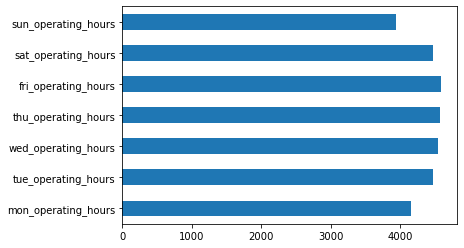

In [159]:
#df_operating_hours.isna() #true/false
#Na values are not counted, this shows the number of operating restaurants each day
df_operating_hours.count().plot(kind = "barh")

# Number of non-operating restaurants each day (Null values)

<AxesSubplot:>

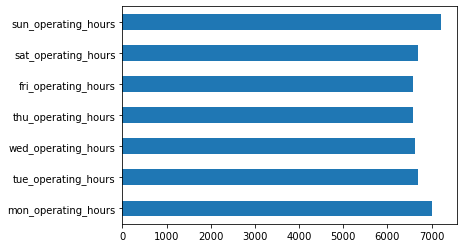

In [160]:
#counting the na values, this show the number of non operating restaurants each day
df_operating_hours.isna().sum().plot(kind = "barh")

# Average operating hours between days

In [161]:
avg_hours_including_null = []
avg_hours_excluding_null = []

df_operating_hours["Total operating hours"] = 0

for i in range (7):
    #Taking daily operating hours out as a dataframe
    df_avg_operating_hours = df_operating_hours.iloc[:, i]

    #Spliting Opening time and Closing time into two columns 
    df_avg_operating_hours = df_avg_operating_hours.str.split("-", expand = True)

    #Purpose of this code is to avoid OutOfBoundsDateTime Errors.
    df_avg_operating_hours[0] =  "2022-03-05 " + df_avg_operating_hours[0] 
    # If closing hour is 12 AM, then it's second day
    # If the closing hour is AM, check if opening hour is PM (means pass 12pm then open, if closing hour is AM then is another day already)
    # If the opening hour is AM, and closing hour is AM ?? closing - open <= 0

    df_avg_operating_hours[1] = np.where(df_avg_operating_hours[1] == " 12:00 AM", "2022-03-06 " + df_avg_operating_hours[1], "2022-03-05 " + df_avg_operating_hours[1])

    df_avg_operating_hours[1] = np.where(df_avg_operating_hours[1].str.split().str[2] == "AM", 
                                    np.where(df_avg_operating_hours[0].str.split().str[2] == "PM", "2022-03-06 " + df_avg_operating_hours[1].str.split().str[1] + " " + df_avg_operating_hours[1].str.split().str[2], df_avg_operating_hours[1]) 
                                    , df_avg_operating_hours[1])

    df_avg_operating_hours[1] = np.where(df_avg_operating_hours[1].str.split().str[2] == "AM", 
                                    np.where(df_avg_operating_hours[0].str.split().str[2] == "AM", 
                                        np.where((df_avg_operating_hours[1].str.split().str[1].str.replace(":", ".").astype(float) - df_avg_operating_hours[0].str.split().str[1].str.replace(":", ".").astype(float)) <= 0, "2022-03-06 " + df_avg_operating_hours[1].str.split().str[1] + " " + df_avg_operating_hours[1].str.split().str[2] 
                                        ,df_avg_operating_hours[1])
                                    , df_avg_operating_hours[1])
                                ,df_avg_operating_hours[1])


    #convert object to datetime for calculation           #.dt.strftime('%H:%M') #show only hours and min but change the data type to string
    df_avg_operating_hours[0] = pd.to_datetime(df_avg_operating_hours[0])
    df_avg_operating_hours[1] = pd.to_datetime(df_avg_operating_hours[1])

    #replacing null values as 0 for calculating total operating hours because null values will affect the sum
    operating_hours = np.where(df_avg_operating_hours[0].isna(), 0, (df_avg_operating_hours[1] - df_avg_operating_hours[0]) / np.timedelta64(1, 'h'))
    df_avg_operating_hours["Opening hours"] = operating_hours

    df_operating_hours["Total operating hours"] = df_operating_hours["Total operating hours"] + operating_hours #this code is for later part.
    
    #Calculate average operating hours including 0 values (null values)
    avg_hours_including_null.append(round(df_avg_operating_hours["Opening hours"].mean(), 2))

    #Calculate average operating hours excluding null values
    #Changing 0 values back to null so mean() will exclude null values
    df_avg_operating_hours["Opening hours"] = df_avg_operating_hours["Opening hours"].replace(0, np.NaN)
    avg_hours_excluding_null.append(round(df_avg_operating_hours["Opening hours"].mean(), 2))

df_avg_operating_hours_including_null = pd.DataFrame(avg_hours_including_null, columns = ["Average Operating Hours (include null values)"])
df_avg_operating_hours_excluding_null = pd.DataFrame(avg_hours_excluding_null, columns = ["Average Operating Hours (exclude null values)"])
df_avg_operating_hours_including_null.index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_avg_operating_hours_excluding_null.index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

#Printing Average Operating Hours between days excluding null values 
df_avg_operating_hours_excluding_null
df_avg_operating_hours_including_null
df_operating_hours

,mon_operating_hours,tue_operating_hours,wed_operating_hours,thu_operating_hours,fri_operating_hours,sat_operating_hours,sun_operating_hours,Total operating hours
0,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,77.0
1,NaN,12:00 PM - 2:30 PM,12:00 PM - 2:30 PM,12:00 PM - 2:30 PM,12:00 PM - 2:30 PM,11:00 AM - 3:00 PM,11:00 AM - 4:30 PM,19.5
2,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,63.0
3,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,84.0
4,11:30 AM - 2:30 PM,11:30 AM - 2:30 PM,11:30 AM - 2:30 PM,11:30 AM - 2:30 PM,11:30 AM - 2:30 PM,11:00 AM - 2:30 PM,11:00 AM - 2:30 PM,22.0
...,...,...,...,...,...,...,...,...
11156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
11157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
11158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
11159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


# Number of days operating (Including null values as 0)

,mon_operating_hours,tue_operating_hours,wed_operating_hours,thu_operating_hours,fri_operating_hours,sat_operating_hours,sun_operating_hours,Total operating hours,# of days open
0,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,77.0,7
1,NaN,12:00 PM - 2:30 PM,12:00 PM - 2:30 PM,12:00 PM - 2:30 PM,12:00 PM - 2:30 PM,11:00 AM - 3:00 PM,11:00 AM - 4:30 PM,19.5,6
2,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,63.0,7
3,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,84.0,7
4,11:30 AM - 2:30 PM,11:30 AM - 2:30 PM,11:30 AM - 2:30 PM,11:30 AM - 2:30 PM,11:30 AM - 2:30 PM,11:00 AM - 2:30 PM,11:00 AM - 2:30 PM,22.0,7
...,...,...,...,...,...,...,...,...,...
11156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
11157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
11158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
11159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0


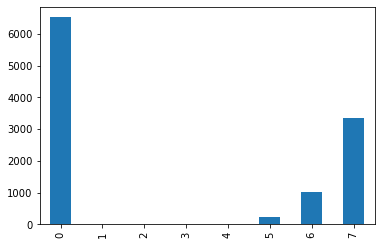

In [162]:
#number of days operating per week
for i in range (7):
    if (i == 0):
        df_operating_hours["# of days open"] = np.where(df_operating_hours.iloc[:, i].isna(), 0, 1)
    else:
        df_operating_hours["# of days open"] = np.where(df_operating_hours.iloc[:, i].isna(), df_operating_hours["# of days open"], df_operating_hours["# of days open"] + 1)

df_operating_hours["# of days open"].value_counts().sort_index().plot(kind = "bar")
df_operating_hours

# Total operating hours per week (Including null values as 0)

In [163]:
df_operating_hours["Total operating hours"] #too much data to plot, even if excluding 0 values (null values)

0        77.0
1        19.5
2        63.0
3        84.0
4        22.0
         ... 
11156     0.0
11157     0.0
11158     0.0
11159     0.0
11160     0.0
Name: Total operating hours, Length: 11161, dtype: float64

# Average daily operating hours

In [164]:
df_operating_hours["Average daily operating hours"] = round(df_operating_hours["Total operating hours"] / df_operating_hours["# of days open"], 2) #divide by the days they operates
df_operating_hours["Average daily operating hours"]

0        11.00
1         3.25
2         9.00
3        12.00
4         3.14
         ...  
11156      NaN
11157      NaN
11158      NaN
11159      NaN
11160      NaN
Name: Average daily operating hours, Length: 11161, dtype: float64

# Does the restaurant operates on weekends? (Treating null values as False)

In [165]:
# df_operating_hours["Operate_on_sat"] = np.where(df_operating_hours["sat_operating_hours"].notna(), True, False)
# df_operating_hours["Operate_on_sun"] = np.where(df_operating_hours["sun_operating_hours"].notna(), True, False)
df_operating_hours["Operate_on_weekends"] = np.where(df_operating_hours["sat_operating_hours"].notna(), np.where(df_operating_hours["sun_operating_hours"].notna(), True, False) , False)
df_operating_hours["Operate_on_only_sat"] = np.where(df_operating_hours["sat_operating_hours"].notna(), np.where(df_operating_hours["sun_operating_hours"].isna(), True, False) , False)
df_operating_hours["Operate_on_only_sun"] = np.where(df_operating_hours["sun_operating_hours"].notna(), np.where(df_operating_hours["sat_operating_hours"].isna(), True, False) , False)
#df_operating_hours

df_operating_hours["Operate_on_weekends"].value_counts() #False 7242, True 3919
#restaurants open on sat and not sun
df_operating_hours["Operate_on_only_sat"].value_counts() #False 10609, True 552
#restaurants open on sun and not sat
df_operating_hours["Operate_on_only_sun"].value_counts() #False 11139, True 22
df_operating_hours

,mon_operating_hours,tue_operating_hours,wed_operating_hours,thu_operating_hours,fri_operating_hours,sat_operating_hours,sun_operating_hours,Total operating hours,# of days open,Average daily operating hours,Operate_on_weekends,Operate_on_only_sat,Operate_on_only_sun
0,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,77.0,7,11.00,True,False,False
1,NaN,12:00 PM - 2:30 PM,12:00 PM - 2:30 PM,12:00 PM - 2:30 PM,12:00 PM - 2:30 PM,11:00 AM - 3:00 PM,11:00 AM - 4:30 PM,19.5,6,3.25,True,False,False
2,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,63.0,7,9.00,True,False,False
3,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,84.0,7,12.00,True,False,False
4,11:30 AM - 2:30 PM,11:30 AM - 2:30 PM,11:30 AM - 2:30 PM,11:30 AM - 2:30 PM,11:30 AM - 2:30 PM,11:00 AM - 2:30 PM,11:00 AM - 2:30 PM,22.0,7,3.14,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,False,False,False
11157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,False,False,False
11158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,False,False,False
11159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,False,False,False


# Is operating hours shown? (False if all 7 days is null)

In [166]:
df_operating_hours["Is_operating_hours_shown"] = np.where(df_operating_hours.iloc[:, :6].isna().all(axis=1), False, True)
df_operating_hours["Is_operating_hours_shown"].value_counts()

#.plot(kind = "barh")

False    6527
True     4634
Name: Is_operating_hours_shown, dtype: int64

In [167]:
df_operating_hours["overall_rating"] = restaurant_rating_df["overall_rating"]
df_operating_hours

,mon_operating_hours,tue_operating_hours,wed_operating_hours,thu_operating_hours,fri_operating_hours,sat_operating_hours,sun_operating_hours,Total operating hours,# of days open,Average daily operating hours,Operate_on_weekends,Operate_on_only_sat,Operate_on_only_sun,Is_operating_hours_shown,overall_rating
0,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,11:00 AM - 10:00 PM,77.0,7,11.00,True,False,False,True,4.0
1,NaN,12:00 PM - 2:30 PM,12:00 PM - 2:30 PM,12:00 PM - 2:30 PM,12:00 PM - 2:30 PM,11:00 AM - 3:00 PM,11:00 AM - 4:30 PM,19.5,6,3.25,True,False,False,True,5.0
2,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,09:00 AM - 6:00 PM,63.0,7,9.00,True,False,False,True,4.5
3,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,10:30 AM - 10:30 PM,84.0,7,12.00,True,False,False,True,5.0
4,11:30 AM - 2:30 PM,11:30 AM - 2:30 PM,11:30 AM - 2:30 PM,11:30 AM - 2:30 PM,11:30 AM - 2:30 PM,11:00 AM - 2:30 PM,11:00 AM - 2:30 PM,22.0,7,3.14,True,False,False,True,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,False,False,False,False,-1.0
11157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,False,False,False,False,-1.0
11158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,False,False,False,False,-1.0
11159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,False,False,False,False,-1.0


# Overall rating difference if restaurants open on weekends

In [171]:
#Restaurant open on weekends 
df_temp = df_operating_hours.loc[df_operating_hours["Operate_on_weekends"] == True]
round(df_temp["overall_rating"].mean(),2) #3.69

3.69

In [172]:
#Restaurant not open on weekends 
df_temp = df_operating_hours.loc[df_operating_hours["Operate_on_weekends"] == False]
round(df_temp["overall_rating"].mean(),2) #2.98

2.98

In [173]:
#Correlation
df_operating_hours["Operate_on_weekends"].corr(df_operating_hours["overall_rating"])

0.19060673083855342

# Number of operating hours & Overall ratings

In [174]:
df_operating_hours["Total operating hours"].corr(df_operating_hours["overall_rating"])

0.16919345812392042

In [175]:
df_operating_hours["Average daily operating hours"].corr(df_operating_hours["overall_rating"])

-0.09616369478986946

# Number of days open & Overall ratings

In [176]:
df_operating_hours["# of days open"].corr(df_operating_hours["overall_rating"])

0.22413689199541673

In [177]:
#Average overall ratings of restaurants that open 7 days
df_temp = df_operating_hours.loc[df_operating_hours["# of days open"] == 7]
round(df_temp["overall_rating"].mean(),2) #3.66

3.66

In [180]:
#Average overall ratings of restaurants that does not open 7 days
df_temp = df_operating_hours.loc[df_operating_hours["# of days open"] != 7]
round(df_temp["overall_rating"].mean(),2) #3.04

3.04

# Does showing operating hours has any correlation to overall ratings?

In [178]:
df_operating_hours["Is_operating_hours_shown"].corr(df_operating_hours["overall_rating"])

0.22940227842149763

In [179]:
#Average overall ratings of restaurants that has operating hours listed
df_temp = df_operating_hours.loc[df_operating_hours["Is_operating_hours_shown"] == True]
round(df_temp["overall_rating"].mean(),2) #3.71

3.71

In [181]:
#Average overall ratings of restaurants that does not has operating hours listed
df_temp = df_operating_hours.loc[df_operating_hours["Is_operating_hours_shown"] == False]
round(df_temp["overall_rating"].mean(),2) #2.88

2.88